In [1]:
%pylab inline
%config InlineBackend.figure_format='svg'

ImportError: No module named 'matplotlib'

In [5]:
import numpy as np

In [7]:
SRC_W, SRC_H = 1024, 768 # the dimensions if wiimkote IRCAM

In [8]:
# 4 IR MARKERS IN WIIMOTE IR CAM
sx1, sy1 = 500, 300
sx2, sy2 = 950, 300
sx3, sy3 = 900, 700
sx4, sy4 = 450, 690

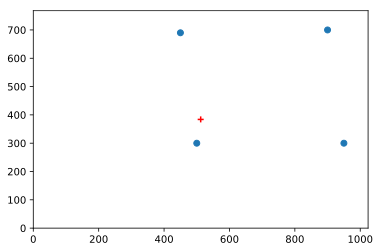

In [62]:
xlim(0, SRC_W) # x-axis range
ylim(0, SRC_H) # y-axis range
scatter([sx1, sx2, sx3, sx4], [sy1, sy2, sy3, sy4]) # spot of the 4 IR markers
scatter([SRC_W/2], [SRC_H/2], color='r', marker='+') # middle if the IRCAM (destination where we areis pointing)

In [2]:
def calculate_matrix(x1, y1, x2, y2, x3, y3, x4, y4):
    # Berechnung der benötigten Matrix
    #
    # Step 1
    source_points_123 = np.matrix([[x1, x2, x3],
                                   [y1, y2, y3], 
                                   [ 1 ,  1 ,  1 ]])

    source_point_4 = [[x4],
                      [y4],
                      [1]]

    scale_to_source = np.linalg.solve(source_points_123, source_point_4)

    ls, ms, ts = [float(x) for x in scale_to_source]
    #
    #
    # Step 2
    unit_to_source = np.matrix([[ls*x1, ms*x2, ts*x3],
                                [ls*y1, ms*y2, ts*y3],
                                [ls*1 , ms*1  , ts*1]])

    #
    #
    # Step 3
    DEST_W = 1920
    DEST_H = 1080
    dx1, dy1 = 0, 0
    dx2, dy2 = DEST_W, 0
    dx3, dy3 = DEST_W, DEST_H
    dx4, dy4 = 0, DEST_H

    dest_points_123 = np.matrix([[dx1, dx2, dx3],
                                 [dy1, dy2, dy3],
                                 [ 1 ,  1 ,  1 ]])
    dest_point_4 = np.matrix([[dx4],
                              [dy4],
                              [ 1 ]])
    scale_to_dest = np.linalg.solve(dest_points_123, dest_point_4)

    ld, md, td = [float(x) for x in scale_to_dest]

    unit_to_dest = np.matrix([[ld*dx1, md*dx2, td*dx3], 
                              [ld*dy1, md*dy2, td*dy3],
                              [ld*1,   md*1,   td*1]])
    #
    #
    # Step 4
    source_to_unit = np.linalg.inv(unit_to_source)
    #
    #
    # Step 5
    source_to_dest = unit_to_dest @ source_to_unit

In [3]:
# Mappen des Mittelpunkts
#
#
x, y, z = [float(w) for w in source_to_dest @ np.matrix([[512],
                            [384],
                            [ 1 ]])]

# step 7: dehomogenization
x = x/z
y = y/z
x, y

NameError: name 'source_to_dest' is not defined

In [4]:
asd = [(1,2), (3,6)]

In [5]:
x1, y1 = asd[0]

In [6]:
x1

1

In [7]:
y1

2

In [8]:
def afg():
    return 1, 2

In [10]:
g = afg()

In [11]:
type(g)

tuple

In [11]:
j, k = afg()

In [13]:
j

1

In [15]:
k

2

In [16]:
tt = [(609, 78), (559, 317), (135, 3), (148, 232)]

In [18]:
tt

In [18]:
sorted(tt)

[(135, 3), (148, 232), (559, 317), (609, 78)]

In [20]:
786 - 847.1789582258892

-61.17895822588923